# ClarifyBot Demo

This notebook demonstrates the RL-driven adaptive question generation and reward modeling capabilities of ClarifyBot. It simulates how the system processes ambiguous human feedback, generates clarification questions using different templates, receives feedback, and adapts its strategy over time.

In [1]:
# Import necessary libraries
import sys
sys.path.append('../src')  # Adjust the path to import modules from the src directory
import random
import matplotlib.pyplot as plt
from llm.question_generator import QuestionGenerator, PROMPT_TEMPLATES, TEMPLATE_REWARDS, TEMPLATE_COUNTS
from rl.reward_model import RewardModel

# Initialize the components
reward_model = RewardModel()
question_generator = QuestionGenerator()

## Step 1: Simulate Ambiguous Human Feedback

We will simulate a sequence of ambiguous feedbacks that ClarifyBot will process interactively.

In [2]:
# Simulated ambiguous feedbacks
ambiguous_feedbacks = [
    "I like the idea of a robot helping me, but I'm not sure about the speed.",
    "The robot should be friendly, but I also want it to be efficient.",
    "I want the assistant to be proactive, but not intrusive.",
    "I care about privacy, but I also want convenience."
]

## Step 2: Interactive RL Loop - Generate Questions, Simulate Feedback, and Update Rewards

For each feedback, ClarifyBot will:
- Select a question template based on current rewards (bandit policy)
- Generate clarification questions
- Simulate user feedback (random thumbs up/down)
- Update the template's reward and usage count
- Track the evolution of rewards and counts

In [3]:
# Track reward and count history for visualization
reward_history = [[] for _ in PROMPT_TEMPLATES]
count_history = [[] for _ in PROMPT_TEMPLATES]

for round_num, feedback in enumerate(ambiguous_feedbacks, 1):
    questions, template_idx = question_generator.generate_clarification_questions(feedback)
    print(f"\n--- Round {round_num} ---")
    print(f"Feedback: {feedback}")
    print(f"Template used: {template_idx+1}")
    for i, q in enumerate(questions, 1):
        print(f"Q{i}: {q}")
    # Simulate user feedback (random thumbs up/down for this template)
    user_reward = random.choice([0, 1])
    print(f"Simulated user feedback (reward): {user_reward}")
    # Update template reward
    TEMPLATE_COUNTS[template_idx] += 1
    TEMPLATE_REWARDS[template_idx] = (
        TEMPLATE_REWARDS[template_idx] * (TEMPLATE_COUNTS[template_idx] - 1) + user_reward
    ) / TEMPLATE_COUNTS[template_idx]
    # Log reward and count history
    for i in range(len(PROMPT_TEMPLATES)):
        reward_history[i].append(TEMPLATE_REWARDS[i])
        count_history[i].append(TEMPLATE_COUNTS[i])


--- Round 1 ---
Feedback: I like the idea of a robot helping me, but I'm not sure about the speed.
Template used: 2
Q1: What do you mean by 'I like the idea of a robot helping me, but I'm not sure about the speed.'?
Q2: Can you clarify your preference regarding 'I like the idea of a robot helping me, but I'm not sure about the speed.'?
Q3: Could you provide more details about 'I like the idea of a robot helping me, but I'm not sure about the speed.'?
Simulated user feedback (reward): 0

--- Round 2 ---
Feedback: The robot should be friendly, but I also want it to be efficient.
Template used: 1
Q1: What do you mean by 'The robot should be friendly, but I also want it to be efficient.'?
Q2: Can you clarify your preference regarding 'The robot should be friendly, but I also want it to be efficient.'?
Q3: Could you provide more details about 'The robot should be friendly, but I also want it to be efficient.'?
Simulated user feedback (reward): 0

--- Round 3 ---
Feedback: I want the assist

## Step 3: Visualize Template Rewards and Usage Counts

We plot the evolution of average reward and usage count for each template over the rounds.

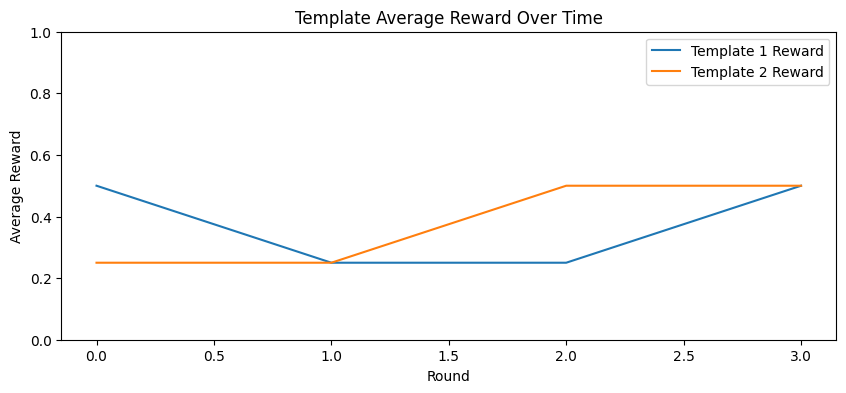

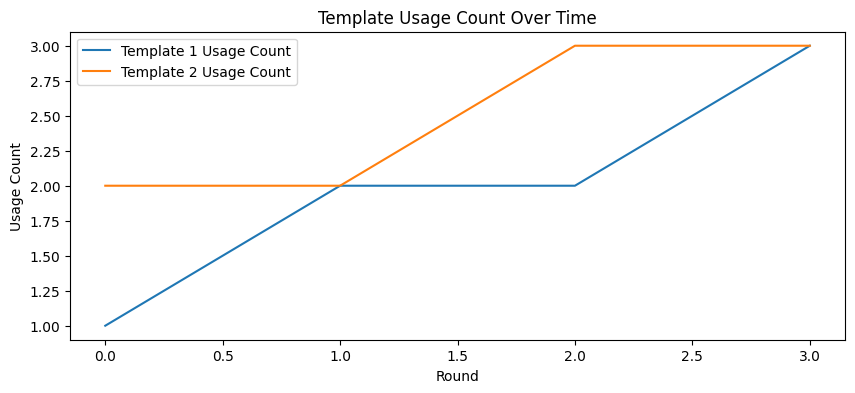

In [4]:
# Plot average reward per template over rounds
plt.figure(figsize=(10, 4))
for i, history in enumerate(reward_history):
    plt.plot(history, label=f'Template {i+1} Reward')
plt.xlabel('Round')
plt.ylabel('Average Reward')
plt.title('Template Average Reward Over Time')
plt.ylim(0, 1)
plt.legend()
plt.show()

# Plot usage count per template over rounds
plt.figure(figsize=(10, 4))
for i, history in enumerate(count_history):
    plt.plot(history, label=f'Template {i+1} Usage Count')
plt.xlabel('Round')
plt.ylabel('Usage Count')
plt.title('Template Usage Count Over Time')
plt.legend()
plt.show()

## Step 4: Reward Modeling and Confidence

You can also use the RewardModel to infer the overall reward from a list of user feedback and summarize preferences.

In [5]:
# Example: Aggregate feedback and infer reward
feedback_list = [random.choice([0, 1]) for _ in range(10)]
print("Simulated feedback list:", feedback_list)
reward = reward_model.infer_reward(feedback_list)
print("Inferred average reward:", reward)

Simulated feedback list: [1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
Inferred average reward: 0.9


## Conclusion

This demo shows how ClarifyBot adaptively selects question-generation strategies using RL, updates template rewards based on feedback, and visualizes the learning process. This approach enables more aligned and effective autonomous systems that learn from imperfect human feedback.